In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential,model_from_json
from keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPool2D,Activation
from keras.layers.core import Flatten,Dense,Dropout
from keras.layers.convolutional import Convolution2D,MaxPooling2D,ZeroPadding2D
from tensorflow.keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from keras.losses import categorical_crossentropy
import matplotlib.pyplot as plt
import cv2

In [2]:
df = pd.read_csv('E:/Backup/Project/Machine Learning/Emotion Detection/fer2013.csv')

In [3]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:
x_train,train_y,x_test,test_y = [],[],[],[]

In [5]:
for index,row in df.iterrows():
    val = row['pixels'].split(' ')
    try:
        if 'Training' in row['Usage']:
            x_train.append(np.array(val,'float32'))
            train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
            x_test.append(np.array(val,'float32'))
            test_y.append(row['emotion'])
    except:
        print(f'Error occured at index:{index} and row: {row}')

In [6]:
x_train = np.array(x_train,'float32')
train_y = np.array(train_y,'float32')
x_test = np.array(x_test,'float32')
test_y = np.array(test_y,'float32')

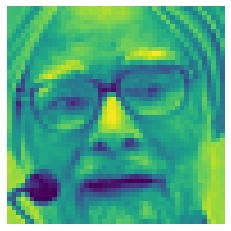

Emotion:  Angry


In [7]:
ii = 1
test_image = x_train[ii]
test_image = np.reshape(test_image, (48,48,1))
plt.imshow(test_image)
plt.axis('off')
plt.show()
emotion_detection = ['Angry','Disgust','Fear','Happy','Sad','Suprise','Neutral']
print('Emotion: ',emotion_detection[int(train_y[ii])])

In [8]:
# setting variables for train
num_features = 64
num_labels = 7
batch_size = 64
epochs = 50
width,height = 48,48

In [9]:
train_y = to_categorical(train_y,num_classes=num_labels)
test_y = to_categorical(test_y,num_classes=num_labels)

x_train.shape

(28709, 2304)

In [10]:
# normalizing data between 0 and 1
x_train -= np.mean(x_train,axis=0)
x_train /= np.std(x_train,axis=0)

x_test -= np.mean(x_test,axis=0)
x_test /= np.std(x_test,axis=0)

# convert to 2d image
x_train = x_train.reshape(x_train.shape[0],48,48,1)
x_test = x_test.reshape(x_test.shape[0],48,48,1)
print(x_train.shape)

(28709, 48, 48, 1)


In [11]:
# designing the CNN
model  = Sequential()

# 1st layer
# 64 - > neural
# kernal-size -> filter size
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(x_train.shape[1:])))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

# 2nd layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

# 3rd layer
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

# before fully connected neural network , we must flaten the image/data.
model.add(Flatten())

# fully connected neural networks
# 1024 -> neurons
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_labels,activation='softmax'))

# model.summary()

In [12]:
# Compiling the model
model.compile(loss=categorical_crossentropy,optimizer='sgd',metrics=['accuracy'])

In [13]:
# Train the model
# model.fit(x_train,train_y,batch_size= batch_size,epochs = epochs, verbose=1, validation_data=(x_test,test_y),shuffle=True)

In [14]:
# result = model.evaluate(x_test,test_y)

In [15]:
# print('Test accuracy: ',result[1])

In [16]:
# saving the model for later
# fer_json = model.to_json()
# with open('fer.json','w') as json_file:
#     json_file.write(fer_json)
# model.save_weights("fer.h5")

# Test with image

In [17]:
model = model_from_json(open('fer.json','r').read())
model.load_weights('fer.h5')

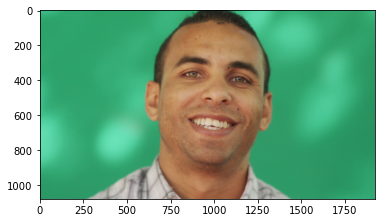

In [18]:
# from file
sample_image = cv2.imread('files/sample.png')

# from camera
# camera_image = cv2.VideoCapture(0)
# return_value, sample_image = camera_image.read()
# camera_image.release()

sample_image1 = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)
plt.imshow(sample_image1)
plt.show()

[[634  80 724 724]]
Happy


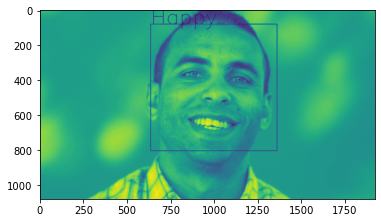

In [25]:
# test with files
sample_image = cv2.imread('files/sample.png')
sample_image1 = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)

faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)
print('face rectangle: ',faces)
# Draw rectange around faces
for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255

    # emotion_detection
    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])
    emotion_detection = ('Angry','Disgust','Fear','Happy','Sad','Suprise','Neutral')
    emotion_detection = emotion_detection[max_index]


    print(emotion_detection)
    image = cv2.putText(sample_image,emotion_detection,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),2,cv2.LINE_AA)
    plt.imshow(image)

face rectangle:  [[305 159 218 218]]
Neutral


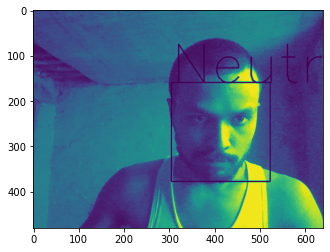

In [30]:
# test with camera
camera_image = cv2.VideoCapture(0)
return_value, sample_image = camera_image.read()
camera_image.release()
sample_image1 = cv2.cvtColor(sample_image,cv2.COLOR_BGR2RGB)
sample_image = cv2.cvtColor(sample_image,cv2.COLOR_BGR2GRAY)

faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml').detectMultiScale(sample_image,1.2,4)
print('face rectangle: ',faces)
# Draw rectange around faces
for (x,y,w,h) in faces:
    cv2.rectangle(sample_image,(x,y),(x+w,y+h),(0,0,255),2)
    roi_gray = sample_image[y:y+w,x:x+h]
    roi_gray = cv2.resize(roi_gray,(48,48))
    image_pixels = img_to_array(roi_gray)
    image_pixels = np.expand_dims(image_pixels,axis=0)
    image_pixels /=255

    # emotion_detection
    predictions = model.predict(image_pixels)
    max_index = np.argmax(predictions[0])
    emotion_detection = ('Angry','Disgust','Fear','Happy','Sad','Suprise','Neutral')
    emotion_detection = emotion_detection[max_index]

    print(emotion_detection)
    image = cv2.putText(sample_image,emotion_detection,(int(x),int(y)),cv2.FONT_HERSHEY_SIMPLEX,4,(0,0,255),2,cv2.LINE_AA)
    plt.imshow(image)